In [1]:
import pandas as pd
import numpy as np  # Import numpy



# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Inspect the first few rows of each dataset
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

# Get more info about the dataset
print("\nTraining Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

# Check for missing values in both datasets
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Training Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   20

In [2]:
# Handling missing numeric values by filling with the median
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)

# Handling categorical missing values by filling with "None" or most frequent category
train_data['Alley'].fillna("None", inplace=True)
test_data['Alley'].fillna("None", inplace=True)

train_data['FireplaceQu'].fillna("None", inplace=True)
test_data['FireplaceQu'].fillna("None", inplace=True)

train_data['GarageType'].fillna("None", inplace=True)
test_data['GarageType'].fillna("None", inplace=True)

# Dropping columns with too many missing values (e.g., PoolQC, MiscFeature)
train_data.drop(['PoolQC', 'MiscFeature'], axis=1, inplace=True)
test_data.drop(['PoolQC', 'MiscFeature'], axis=1, inplace=True)

# Check again for any remaining missing values
print("\nMissing Values in Training Data after imputation:")
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

print("\nMissing Values in Test Data after imputation:")
print(test_data.isnull().sum().sort_values(ascending=False).head(10))



Missing Values in Training Data after imputation:
Fence           1179
MasVnrType       872
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
dtype: int64

Missing Values in Test Data after imputation:
Fence           1169
MasVnrType       894
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
dtype: int64


In [3]:
# Categorical columns: Fill with "None" for missing values
categorical_columns = ['Fence', 'MasVnrType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

for col in categorical_columns:
    train_data[col].fillna("None", inplace=True)
    test_data[col].fillna("None", inplace=True)

# For GarageYrBlt (a year), fill missing values with the median year or 0 if no garage
train_data['GarageYrBlt'].fillna(0, inplace=True)
test_data['GarageYrBlt'].fillna(0, inplace=True)

# For any numeric columns like MasVnrArea, fill with 0 if no masonry veneer is present
train_data['MasVnrArea'].fillna(0, inplace=True)
test_data['MasVnrArea'].fillna(0, inplace=True)

# Final check for missing values
print("\nRemaining Missing Values in Training Data:")
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

print("\nRemaining Missing Values in Test Data:")
print(test_data.isnull().sum().sort_values(ascending=False).head(10))



Remaining Missing Values in Training Data:
Electrical      1
Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
dtype: int64

Remaining Missing Values in Test Data:
MSZoning        4
BsmtHalfBath    2
Functional      2
BsmtFullBath    2
Utilities       2
BsmtFinSF1      1
Exterior1st     1
GarageCars      1
GarageArea      1
KitchenQual     1
dtype: int64


In [4]:
# Filling missing value in 'Electrical' for training data with mode
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0], inplace=True)

# Filling missing values in the test data
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0], inplace=True)
test_data['Functional'].fillna(test_data['Functional'].mode()[0], inplace=True)
test_data['BsmtHalfBath'].fillna(0, inplace=True)  # Numeric, fill with 0
test_data['BsmtFullBath'].fillna(0, inplace=True)  # Numeric, fill with 0
test_data['BsmtFinSF1'].fillna(0, inplace=True)    # Numeric, fill with 0
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0], inplace=True)
test_data['GarageCars'].fillna(test_data['GarageCars'].median(), inplace=True)  # Numeric
test_data['GarageArea'].fillna(test_data['GarageArea'].median(), inplace=True)  # Numeric
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0], inplace=True)

# Final check for missing values
print("\nFinal Check - Training Data Missing Values:")
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

print("\nFinal Check - Test Data Missing Values:")
print(test_data.isnull().sum().sort_values(ascending=False).head(10))



Final Check - Training Data Missing Values:
Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64

Final Check - Test Data Missing Values:
SaleType        1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
Exterior2nd     1
Id              0
HalfBath        0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64


In [5]:
# Handling remaining missing values in the test dataset
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0], inplace=True)

# Filling missing basement-related numeric features with 0
test_data['TotalBsmtSF'].fillna(0, inplace=True)
test_data['BsmtUnfSF'].fillna(0, inplace=True)
test_data['BsmtFinSF2'].fillna(0, inplace=True)

# Final check for any remaining missing values
print("\nFinal Check - Test Data Missing Values:")
print(test_data.isnull().sum().sort_values(ascending=False).head(10))




Final Check - Test Data Missing Values:
Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
BsmtHalfBath    0
dtype: int64


/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


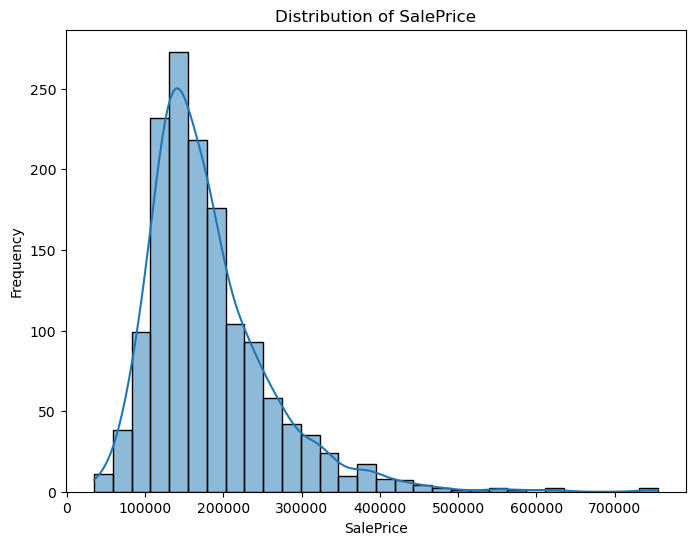

Skewness of SalePrice: 1.8828757597682129


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of SalePrice
plt.figure(figsize=(8,6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Checking for skewness
print(f"Skewness of SalePrice: {train_data['SalePrice'].skew()}")


/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


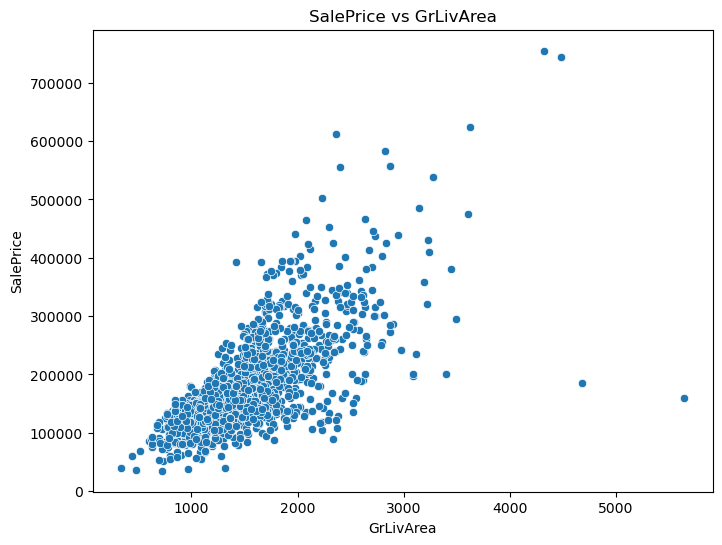

/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


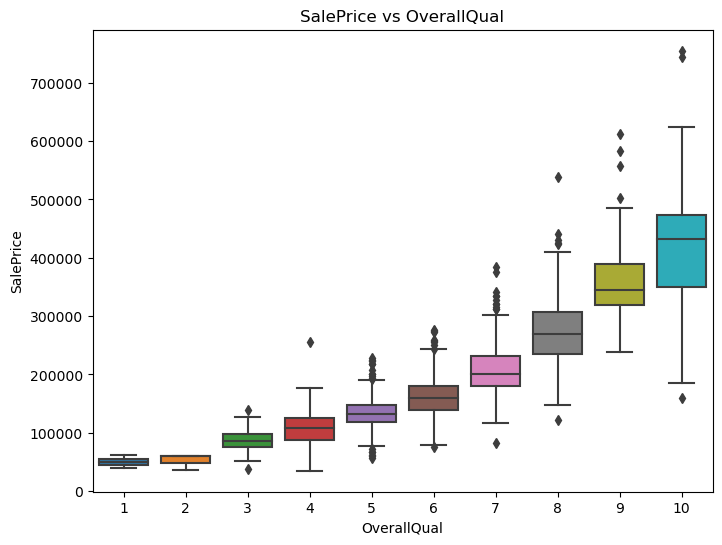

In [7]:
# Scatter plot for SalePrice vs GrLivArea (Above grade living area)
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot for SalePrice vs OverallQual (Overall quality)
plt.figure(figsize=(8,6))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


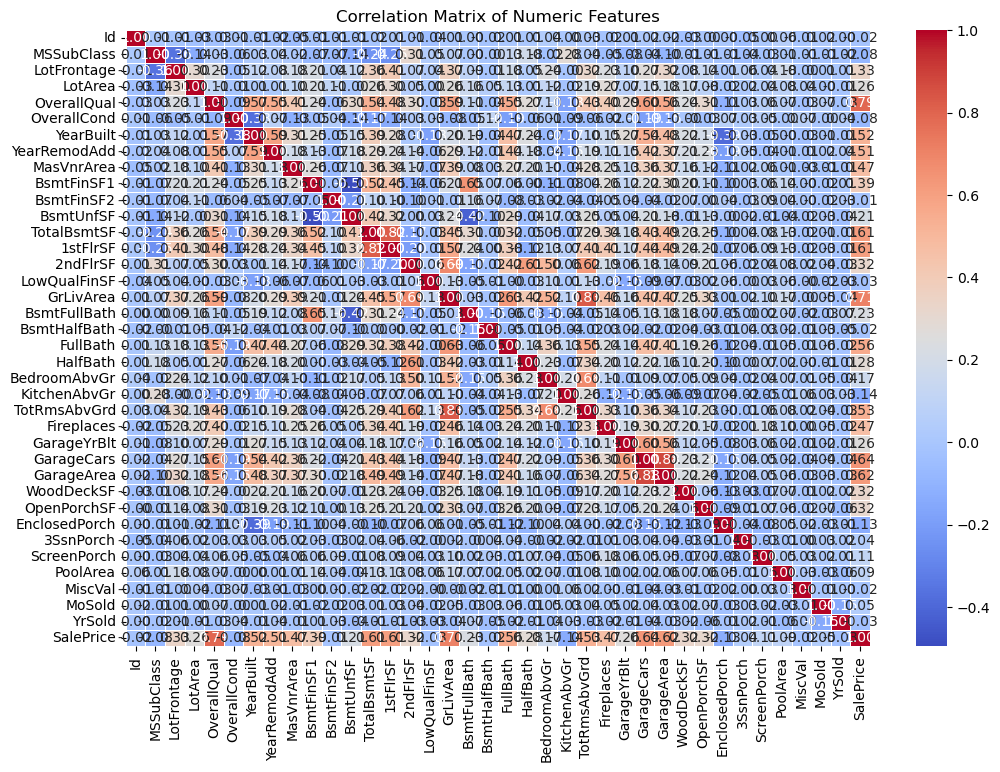

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [8]:
# Selecting only numeric columns for the correlation matrix
numeric_features = train_data.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_features.corr()

# Plotting a heatmap of the correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Displaying the top 5 correlations with SalePrice
print(corr_matrix['SalePrice'].sort_values(ascending=False).head(10))



/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vijeethvj8/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


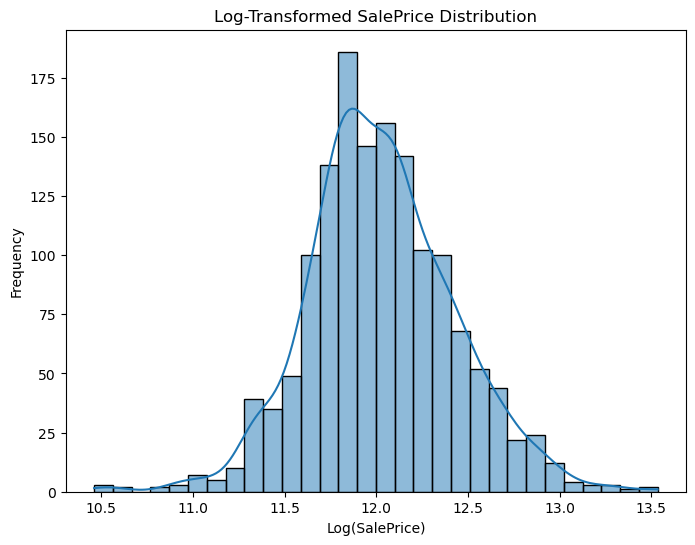

Skewness of SalePrice: 0.12133506220520406


In [9]:
# Log transforming SalePrice to normalize the distribution
train_data['SalePrice'] = np.log(train_data['SalePrice'])

# Re-check the distribution after transformation
plt.figure(figsize=(8,6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Log-Transformed SalePrice Distribution')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

# Checking for skewness
print(f"Skewness of SalePrice: {train_data['SalePrice'].skew()}")


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting the top features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                     'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

X = train_data[selected_features]
y = train_data['SalePrice']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the validation set
y_pred = model.predict(X_val)

# Evaluating the model using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Linear Regression RMSE: {rmse}')


Linear Regression RMSE: 0.17373551925770503


In [11]:
# Reverting the log transformation (exponentiating) for both predictions and actual values
y_val_exp = np.exp(y_val)
y_pred_exp = np.exp(y_pred)

# Calculating RMSE on the original SalePrice scale
rmse_original_scale = np.sqrt(mean_squared_error(y_val_exp, y_pred_exp))
print(f'Linear Regression RMSE (Original Scale): {rmse_original_scale}')


Linear Regression RMSE (Original Scale): 31768.93616572737


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Building a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluating the Random Forest model on log-transformed values
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f'Random Forest RMSE (Log-Transformed): {rmse_rf}')

# Reverting the log transformation for original SalePrice scale
y_pred_rf_exp = np.exp(y_pred_rf)
rmse_rf_original = np.sqrt(mean_squared_error(np.exp(y_val), y_pred_rf_exp))
print(f'Random Forest RMSE (Original Scale): {rmse_rf_original}')


Random Forest RMSE (Log-Transformed): 0.17053497523293587
Random Forest RMSE (Original Scale): 29822.247291000207


In [13]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f'Best parameters: {rf_grid_search.best_params_}')
best_rf_model = rf_grid_search.best_estimator_

# Predicting with the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_val)

# RMSE on log-transformed scale
rmse_best_rf = np.sqrt(mean_squared_error(y_val, y_pred_best_rf))
print(f'Best Random Forest RMSE (Log-Transformed): {rmse_best_rf}')

# RMSE on original scale
y_pred_best_rf_exp = np.exp(y_pred_best_rf)
rmse_best_rf_original = np.sqrt(mean_squared_error(np.exp(y_val), y_pred_best_rf_exp))
print(f'Best Random Forest RMSE (Original Scale): {rmse_best_rf_original}')


Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest RMSE (Log-Transformed): 0.17024296197972316
Best Random Forest RMSE (Original Scale): 31391.300210381418


In [14]:
# Using the best Random Forest model to predict on the test set
test_predictions = best_rf_model.predict(test_data[selected_features])

# Reverting the log transformation to get the original SalePrice
test_predictions_exp = np.exp(test_predictions)

# Creating a submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions_exp
})




In [15]:
# Assuming test_predictions contains log-transformed predictions from your Random Forest model
# Revert the log transformation to get the original scale predictions
test_predictions_exp = np.exp(test_predictions)

# Creating the correct submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions_exp  # Use the exponentiated predictions
})

# Save to CSV for Kaggle submission
submission.to_csv('submission.csv', index=False)
